In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hmelq.csv")

In [3]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 335.3+ KB


In [5]:
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


### Columns Description

<ul>
    <li> <b>BAD:</b> 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan </li><br>
    <li> <b>LOAN:</b> Amount of the loan request  </li><br>
    <li> <b>MORTDUE:</b> Amount due on existing mortgage  </li><br>
    <li> <b>VALUE:</b> Value of current property  </li><br>
    <li> <b>REASON:</b> DebtCon = debt consolidation; HomeImp = home improvement  </li><br>
    <li> <b>JOB:</b> Occupational categories  </li><br>
    <li> <b>YOJ: </b>Years at present job </li><br>
    <li> <b>DEROG:</b> Number of major derogatory reports </li><br>
    <li> <b>DELINQ:</b> Number of delinquent credit lines</li><br>
    <li><b> CLAGE:</b> Age of oldest credit line in months</li><br>
    <li> <b>NINQ:</b> Number of recent credit inquiries </li><br>
    <li> <b>CLNO:</b> Number of credit lines</li><br>
    <li> <b>DEBTINC:</b> Debt-to-income ratio</li>
     
</ul>

In [6]:
data['bad'] = ['GOOD' if i == 0 else 'BAD' for i in data.bad]

In [7]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,GOOD,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,GOOD,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,GOOD,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,GOOD,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,GOOD,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [8]:
data.tail()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3571,BAD,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,BAD,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,BAD,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,BAD,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN
3575,BAD,5900,NaN,28000.0,DebtCon,Self,1.0,2.0,1.0,36.77,1.0,8.0,NaN


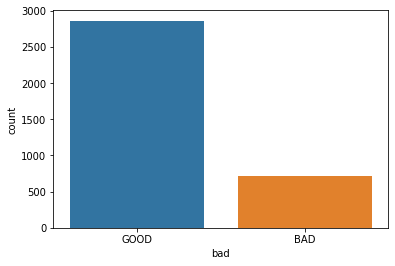

In [9]:
sns.countplot("bad" ,data = data)

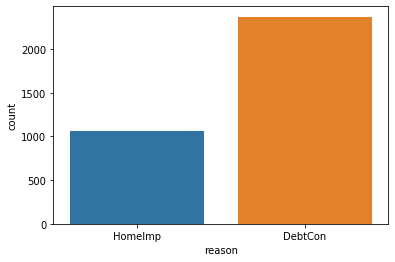

In [10]:
sns.countplot("reason" ,data = data)

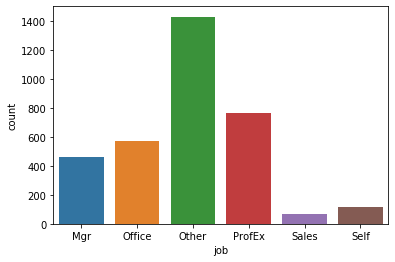

In [11]:
sns.countplot("job" ,data = data)

Text(0.5, 1.0, 'Rates by professions')

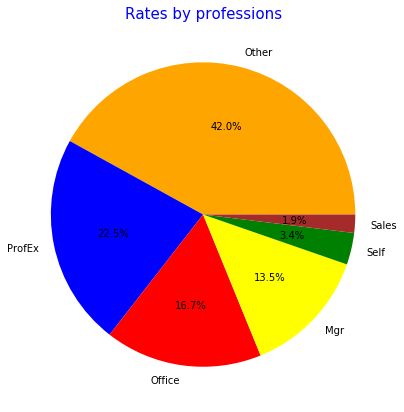

In [12]:
labels = data.job.value_counts().index
colors = ['orange','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = data.job.value_counts().values


plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Rates by professions',color = 'blue',fontsize = 15)

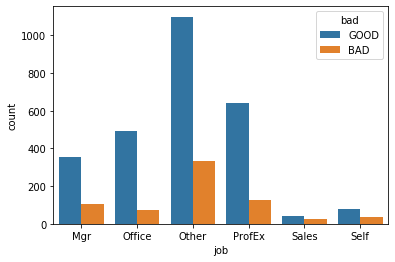

In [13]:
# Hangi meslekler kredisini ödemiş ya da ödememiş

sns.countplot("job", hue = "bad" , data = data)
plt.show()

In [14]:
bad_job = pd.crosstab(index = data["reason"], columns = data["bad"])

bad_job

bad,BAD,GOOD
reason,,
DebtCon,440,1931
HomeImp,244,814


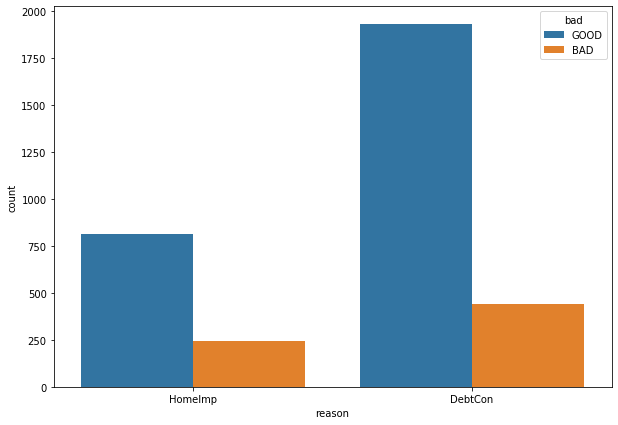

In [15]:
# Kredi alınma sebepleri ile ödenip/ödenmeme durumu
plt.figure(figsize = (10, 7)) 
sns.countplot("reason", hue = "bad" , data = data)
plt.show()

In [16]:
job_reason = pd.crosstab(index = data["job"], columns = data["reason"])

job_reason

reason,DebtCon,HomeImp
job,,
Mgr,342,104
Office,378,178
Other,974,422
ProfEx,503,248
Sales,60,6
Self,45,66


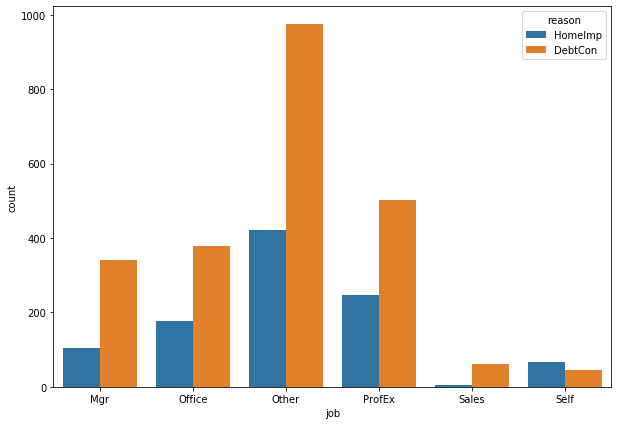

In [17]:
# Mesleklere göre kredi sebepleri

plt.figure(figsize = (10, 7)) 
sns.countplot("job", hue = "reason" , data = data)
plt.show()

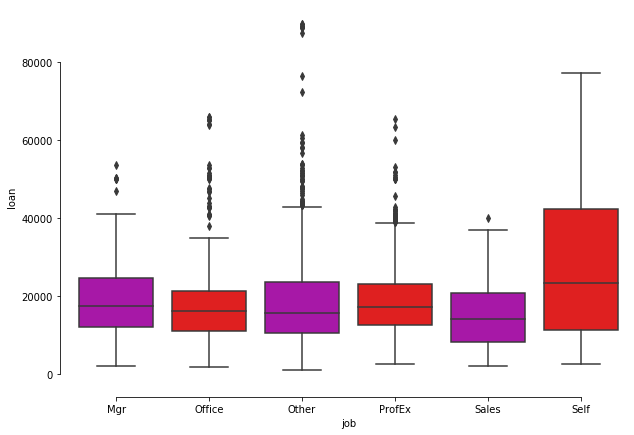

In [18]:
# Mesleklere göre kredi talep tutarı

plt.figure(figsize = (10, 7)) 

sns.boxplot(x="job", y="loan", palette=["m", "r"],
            data=data)
sns.despine(offset=10, trim=True)

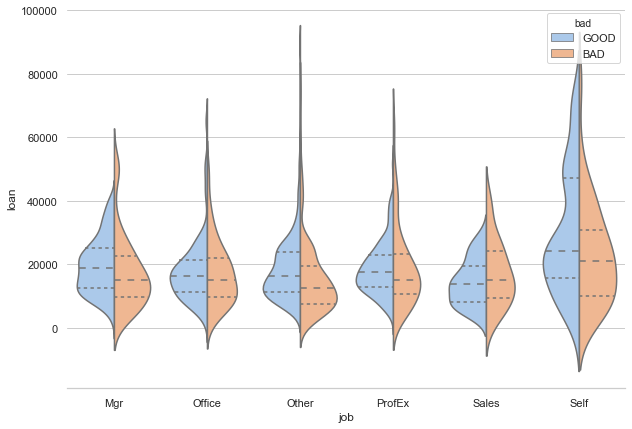

In [19]:
# Mesleklerin kredi talep tutarları ve ödenip / ödenmeme durumu

plt.figure(figsize = (10, 7)) 
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="job", y="loan", hue="bad",
               split=True, inner="quart",
               data=data)
sns.despine(left=True)

C:\Users\Asiye\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Asiye\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


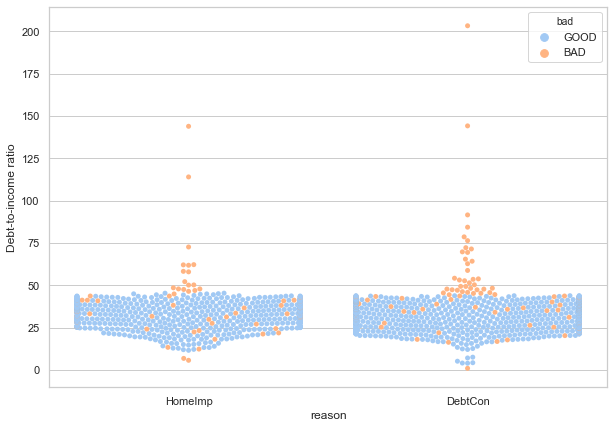

In [20]:
# Borç gelir oranı - sebep - kredi ödeyip / ödememe durumu
plt.figure(figsize = (10, 7)) 
sns.swarmplot(x="reason", y="debtinc",hue="bad", data=data)
plt.ylabel("Debt-to-income ratio")
plt.show()

In [21]:
# Normalizsyon (loan - mortdue - value)

# Mesleklere göre kredi talep tutarı , ipotek ödenek tutarı ve mevcut mülkün değeri

loan = (data.loan - min(data.loan))/(max(data.loan)-min(data.loan))
mortdue = (data.mortdue - min(data.mortdue))/(max(data.mortdue)-min(data.mortdue))
value = (data.value - min(data.value))/(max(data.value)-min(data.value))
    
 

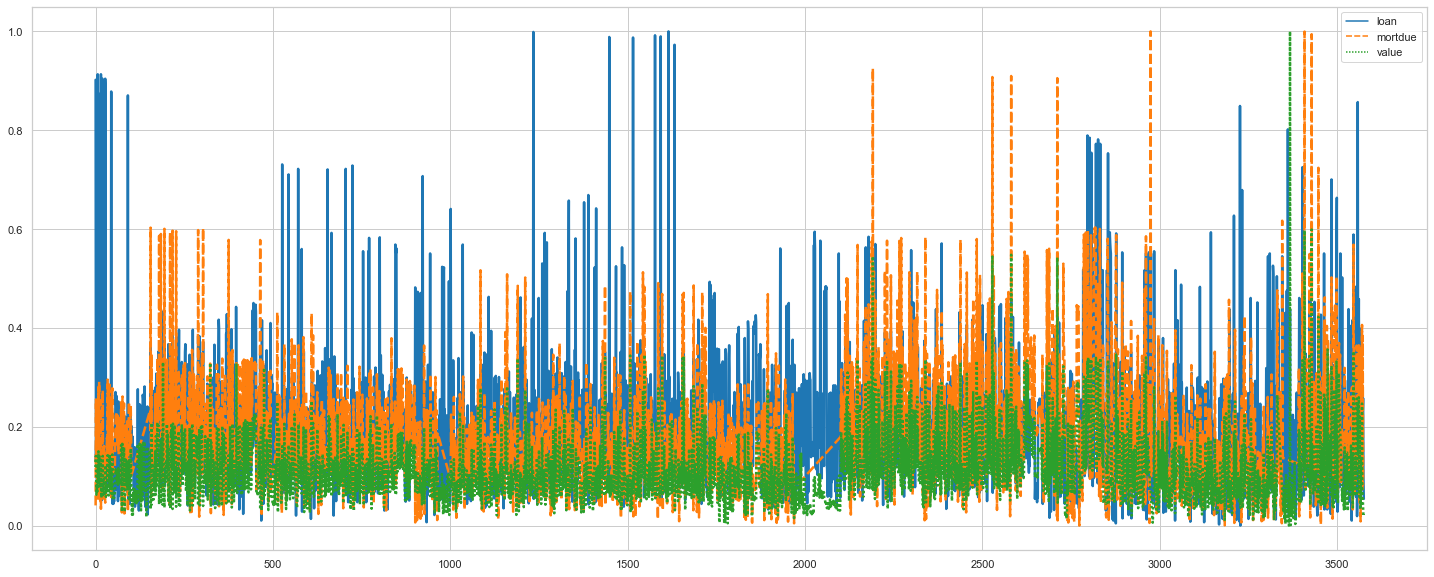

In [22]:
d = {'loan': loan, 'mortdue': mortdue, 'value' :value}
da = pd.DataFrame(data=d)

plt.figure(figsize = (25, 10))
sns.lineplot(data=da, palette="tab10", linewidth=2.5)

C:\Users\Asiye\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Asiye\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


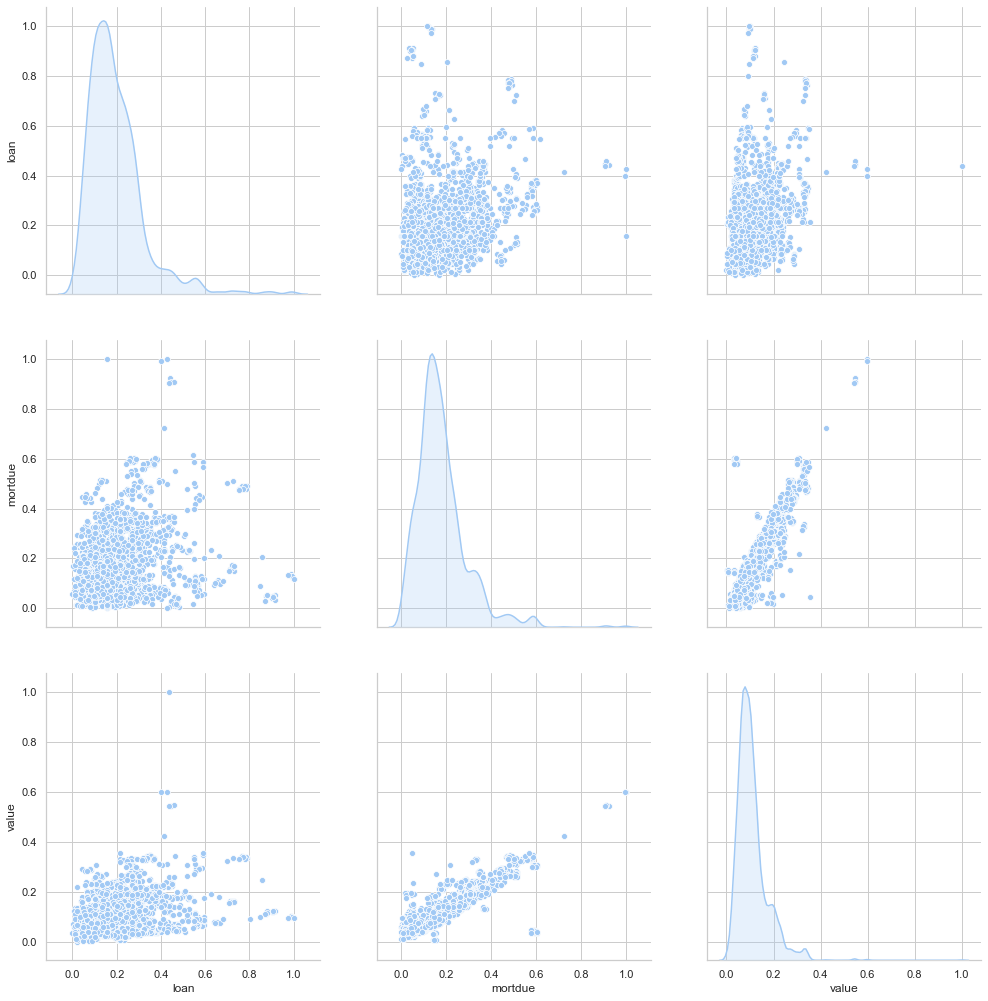

In [23]:
g = sns.pairplot(da,diag_kind="kde")
g.fig.set_size_inches(15,15)

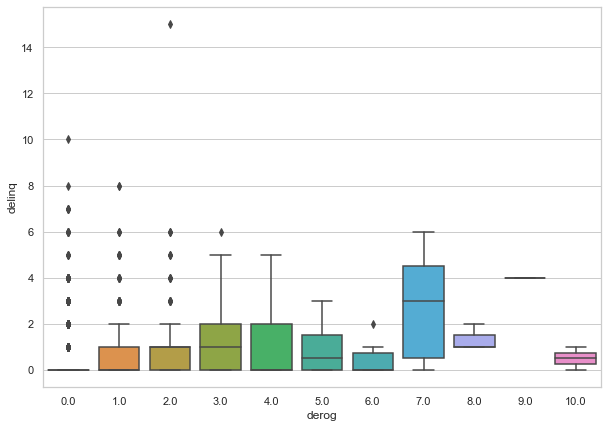

In [24]:
# Borç/gelir oranınına göre müşterilerin kredi borcu durumu

plt.figure(figsize = (10, 7)) 
sns.boxplot(x="derog", y="delinq",           
               data=data)

# HİPOTEZ TESTLERİ

In [25]:
import pylab
import scipy.stats as stats
import statsmodels.api as sm

In [26]:
stats.describe(data.loan)

DescribeResult(nobs=3576, minmax=(1100, 89900), mean=18529.697986577183, variance=126851431.06960154, skewness=2.049604648222838, kurtosis=7.101453299904799)

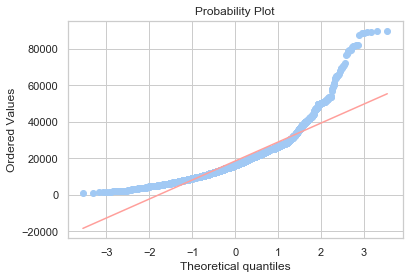

In [27]:
stats.probplot(data.loan, dist = "norm", plot = pylab)
pylab.show()

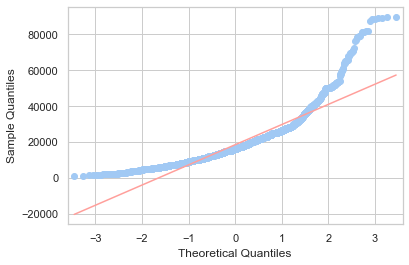

In [28]:
sm.qqplot(data.loan, line =  "s")   # En çok kullanılan
pylab.show()

In [29]:
# Normallik Testleri
from scipy.stats import shapiro


Statistics = 0.849, p = 0.000


# -------------------------------------------------------------

In [ ]:
# BAD - LOAN 

Text(0.5, 0, 'GOOD or BAD')

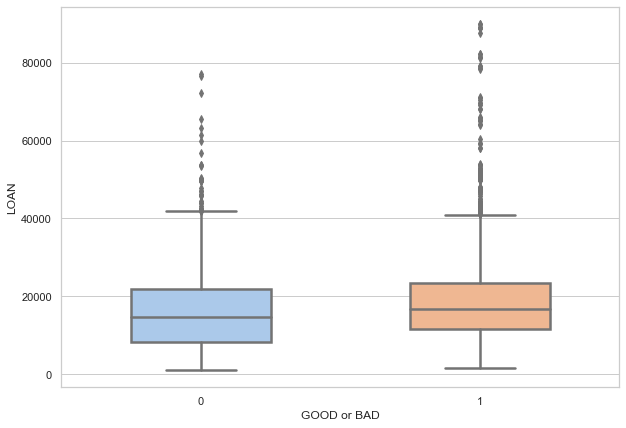

In [99]:
# Independent Sample T-Test

bad_loan = data[data['bad'] == 'BAD']['loan']
good_loan = data[data['bad'] == 'GOOD']['loan']

plt.figure(figsize = (10, 7)) 
sns.boxplot(data = [bad_loan, good_loan], linewidth = 2.5, width = 0.50)

plt.ylabel('LOAN')
plt.xlabel('GOOD or BAD')

In [101]:
stat , p = shapiro(bad_loan)  # stat : olasılık değeri  p : hipotezimizi test etmek için kullanıyoruz
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.864, p = 0.000


In [102]:
stat , p = shapiro(good_loan)  # stat : olasılık değeri  p : hipotezimizi test etmek için kullanıyoruz
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.835, p = 0.000


In [103]:
stats.levene(bad_loan,good_loan)

LeveneResult(statistic=6.342735297730182, pvalue=0.011829622490936536)

In [104]:
stats.ttest_ind(bad_loan,good_loan,equal_var = True)

Ttest_indResult(statistic=-4.286855660108493, pvalue=1.8600438022999733e-05)

In [181]:
independentSample_result = stats.ttest_ind(np.log(bad_loan), np.log(good_loan), equal_var=True)

bad_loan = {'DF':[bad_loan.count() + good_loan.count() - 2], 
        'Test Statistic':[independentSample_result[0]], 
        'p-Value':[independentSample_result[1]]}
result = pd.DataFrame(bad_loan)
result

,DF,Test Statistic,p-Value
0,3574,-8.567839,1.544926e-17


In [ ]:
# BAD - DEBTINC

Text(0.5, 0, 'GOOD or BAD')

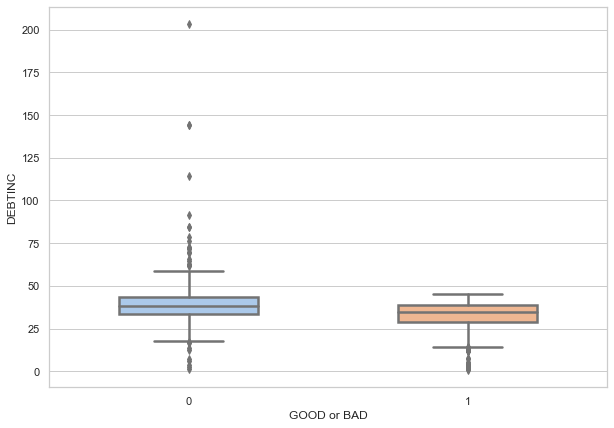

In [134]:
bad_d = data[data['bad'] == 'BAD']['debtinc']
good_d = data[data['bad'] == 'GOOD']['debtinc']

plt.figure(figsize = (10, 7)) 
sns.boxplot(data = [bad_d, good_d], linewidth = 2.5, width = 0.50)

plt.ylabel('DEBTINC')
plt.xlabel('GOOD or BAD')

In [132]:
bad_d[:].fillna(np.nanmedian(bad_d),inplace = True)
good_d[:].fillna(np.nanmedian(good_d),inplace = True)

In [131]:
stat , p = shapiro(bad_d)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.404, p = 0.000


In [133]:
stat , p = shapiro(good_d)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.942, p = 0.000


In [192]:
independentSample_result_debtinc = stats.ttest_ind(np.log(bad_d), np.log(good_d), equal_var=True)

bad_debtinc = {'DF':[bad_d.count() + good_d.count() - 2], 
        'Test Statistic':[independentSample_result_debtinc[0]], 
        'p-Value':[independentSample_result_debtinc[1]]}
result_debtinc = pd.DataFrame(bad_debtinc)
result_debtinc

,DF,Test Statistic,p-Value
0,2807,NaN,NaN


In [ ]:
# BAD - VALUE

Text(0.5, 0, 'GOOD or BAD')

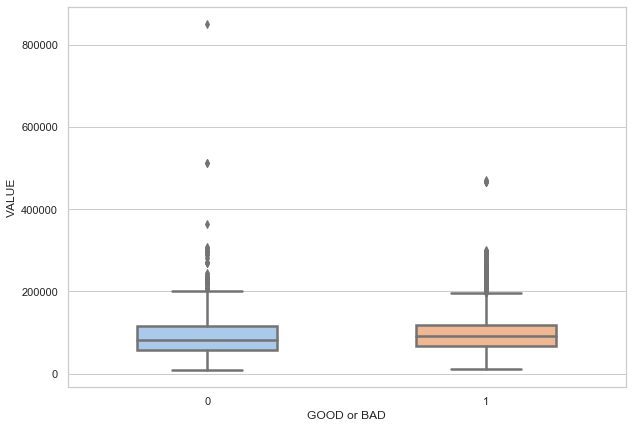

In [135]:
bad_v = data[data['bad'] == 'BAD']['value']
good_v = data[data['bad'] == 'GOOD']['value']

plt.figure(figsize = (10, 7)) 
sns.boxplot(data = [bad_v, good_v], linewidth = 2.5, width = 0.50)

plt.ylabel('VALUE')
plt.xlabel('GOOD or BAD')

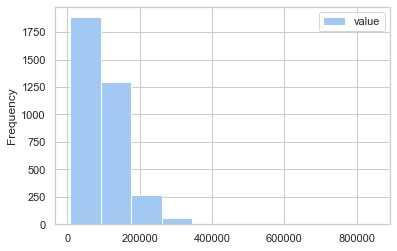

In [136]:
pd.DataFrame(data.value).plot.hist()

In [142]:
bad_v[:].fillna(np.nanmedian(bad_v),inplace = True)
good_v[:].fillna(np.nanmedian(good_v),inplace = True)

In [143]:
stat , p = shapiro(bad_v)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.732, p = 0.000


In [145]:
stat , p = shapiro(good_v)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.878, p = 0.000


In [193]:
independentSample_result_value = stats.ttest_ind(np.log(bad_v), np.log(good_v), equal_var=True)

bad_value = {'DF':[bad_v.count() + good_v.count() - 2], 
        'Test Statistic':[independentSample_result_value[0]], 
        'p-Value':[independentSample_result_value[1]]}
result_bad_value = pd.DataFrame(bad_value)
result_bad_value

,DF,Test Statistic,p-Value
0,3574,-6.361712,2.247951e-10


In [146]:
# BAD - MORTDUE


Text(0.5, 0, 'GOOD or BAD')

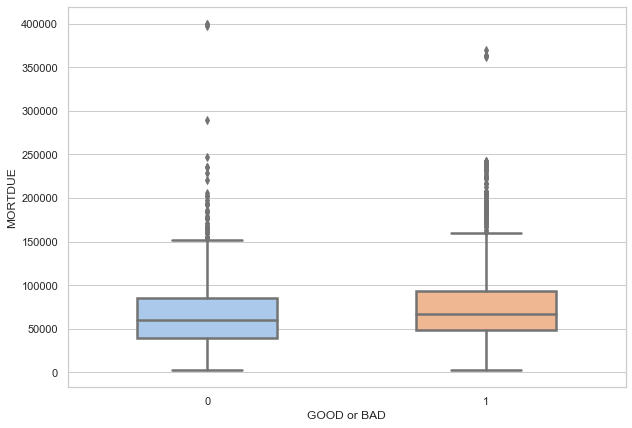

In [147]:
bad_m = data[data['bad'] == 'BAD']['mortdue']
good_m = data[data['bad'] == 'GOOD']['mortdue']

plt.figure(figsize = (10, 7)) 
sns.boxplot(data = [bad_m, good_m], linewidth = 2.5, width = 0.50)

plt.ylabel('MORTDUE')
plt.xlabel('GOOD or BAD')

In [149]:
bad_m[:].fillna(np.nanmedian(bad_m),inplace = True)
good_m[:].fillna(np.nanmedian(good_m),inplace = True)

In [151]:
stat , p = shapiro(bad_m)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.806, p = 0.000


In [150]:
stat , p = shapiro(good_m)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.883, p = 0.000


In [194]:
independentSample_result_bad_mortdue = stats.ttest_ind(np.log(bad_m), np.log(good_m), equal_var=True)

bad_mortdue = {'DF':[bad_m.count() + good_m.count() - 2], 
        'Test Statistic':[independentSample_result_bad_mortdue[0]], 
        'p-Value':[independentSample_result_bad_mortdue[1]]}
result_bad_mortdue = pd.DataFrame(bad_mortdue)
result_bad_mortdue                                
                                     
                                     

,DF,Test Statistic,p-Value
0,3574,-5.282016,1.354000e-07


In [159]:
# BAD - YOJ


Text(0.5, 0, 'GOOD or BAD')

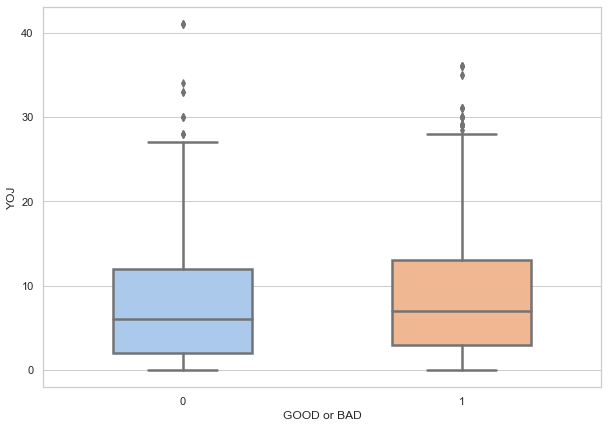

In [154]:
bad_y = data[data['bad'] == 'BAD']['yoj']
good_y = data[data['bad'] == 'GOOD']['yoj']

plt.figure(figsize = (10, 7)) 
sns.boxplot(data = [bad_y, good_y], linewidth = 2.5, width = 0.50)

plt.ylabel('YOJ')
plt.xlabel('GOOD or BAD')

In [156]:
bad_y[:].fillna(np.nanmedian(bad_y),inplace = True)
good_y[:].fillna(np.nanmedian(good_y),inplace = True)

In [157]:
stat , p = shapiro(bad_y)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.879, p = 0.000


In [158]:
stat , p = shapiro(good_y)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.899, p = 0.000


In [195]:
independentSample_result_bad_yoj = stats.ttest_ind(np.log(bad_y), np.log(good_y), equal_var=True)

bad_yoj = {'DF':[bad_y.count() + good_y.count() - 2], 
        'Test Statistic':[independentSample_result_bad_yoj[0]], 
        'p-Value':[independentSample_result_bad_yoj[1]]}
result_bad_yoj = pd.DataFrame(bad_yoj)
result_bad_yoj   

,DF,Test Statistic,p-Value
0,3574,NaN,NaN


In [170]:
# BAD - CLAGE

Text(0.5, 0, 'GOOD or BAD')

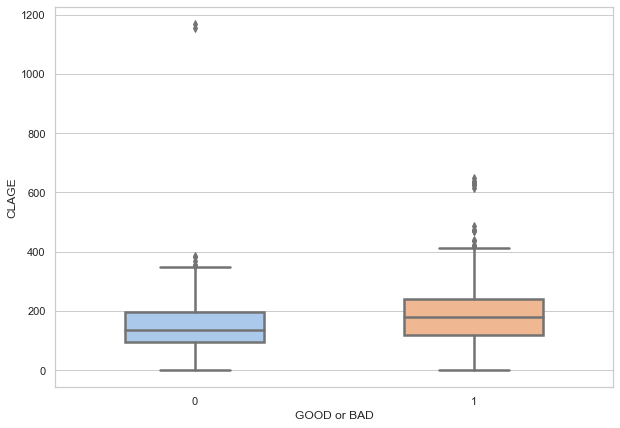

In [161]:
bad_c = data[data['bad'] == 'BAD']['clage']
good_c = data[data['bad'] == 'GOOD']['clage']

plt.figure(figsize = (10, 7)) 
sns.boxplot(data = [bad_c, good_c], linewidth = 2.5, width = 0.50)

plt.ylabel('CLAGE')
plt.xlabel('GOOD or BAD')

In [163]:
bad_c[:].fillna(np.nanmedian(bad_c),inplace = True)
good_c[:].fillna(np.nanmedian(good_c),inplace = True)

In [164]:
stat , p = shapiro(bad_c)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.763, p = 0.000


In [165]:
stat , p = shapiro(good_c)  
print('Statistics = %.3f, p = %.3f'% (stat,p))

Statistics = 0.953, p = 0.000


In [197]:
independentSample_result_clage = stats.ttest_ind(np.log(bad_c), np.log(good_c), equal_var=True)

bad_clage = {'DF':[bad_c.count() + good_c.count() - 2], 
        'Test Statistic':[independentSample_result_clage[0]], 
        'p-Value':[independentSample_result_clage[1]]}
result_clage = pd.DataFrame(bad_clage)
result_clage

,DF,Test Statistic,p-Value
0,3574,-11.033954,7.345228e-28


In [208]:
# Chi-Squared Test

#JOB - BAD

In [204]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [199]:
data_crosstab = pd.crosstab(data.bad,data.job, margins = False) 
data_crosstab

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
BAD,107,75,332,128,23,34
GOOD,354,494,1099,639,43,81


In [202]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [205]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [207]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


In [210]:
# JOB - REASON


crosstab = pd.crosstab(data.reason,data.job, margins = False) 
crosstab

job,Mgr,Office,Other,ProfEx,Sales,Self
reason,,,,,,
DebtCon,342,378,974,503,60,45
HomeImp,104,178,422,248,6,66


In [211]:
stat, p, dof, expected = chi2_contingency(crosstab)

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
    
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
